## **GoogLeNet (Inception V3)**
![](https://production-media.paperswithcode.com/methods/inceptionv3onc--oview_vjAbOfw.png)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**IMPORTING NECESSARY LIBRARIES FOR TRAINING OF MODEL**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import os
from glob import glob
from sklearn.metrics import confusion_matrix
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tensorflow import keras
import pandas as pd
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D ,LeakyReLU


### Training & DataLoader


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [299, 299]

train_path = '/content/drive/MyDrive/Rice_Dataset_2/RiceLeafsDisease/train/'
valid_path = '/content/drive/MyDrive/Rice_Dataset_2/RiceLeafsDisease/valid/'
test_path  = '/content/drive/MyDrive/Rice_Dataset_2/RiceLeafsDisease/test/'

### Building the VGG16


In [ ]:
IMG_SHAPE = IMAGE_SIZE
base_model = tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE +[3], include_top= False,weights='imagenet')

type(base_model)
input = tf.keras.applications.inception_v3.preprocess_input

In [ ]:
# don't train existing weights
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Rice_Dataset_2/RiceLeafsDisease/train/*')
print(len(folders))


4


In [ ]:
# our layers - you can add more if you want
x = Flatten()(base_model.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=base_model.input, outputs=prediction)


### Summary


In [ ]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 149, 149, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomHeight(0.2),
  tf.keras.layers.RandomWidth(0.2),
])
for image, _ in train_dataset.take(1):
    plt.figure(figsize=(10, 4))
    first_image = image[0]
    for i in range(10):
        ax = plt.subplot(2, 5, i+1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

### Training The VGG16


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

valid_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (299, 299),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1400 images belonging to 4 classes.


In [ ]:
valid_set = valid_datagen.flow_from_directory(valid_path,
                                            target_size = (299, 299),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 352 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (299, 299),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 120 images belonging to 4 classes.


In [ ]:
#Printing the classes.
class_dict = training_set.class_indices
(class_dict)
li = list(class_dict.keys())
print(li)

['brown_spot', 'healthy', 'hispa', 'leaf_blast']


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=valid_set,
  epochs= 50,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set)
)

Epoch 1/50
44/44 [==============================] - 433s 10s/step - loss: 8.6953 - accuracy: 0.5629 - val_loss: 6.2219 - val_accuracy: 0.6932
Epoch 2/50
44/44 [==============================] - 129s 3s/step - loss: 3.9330 - accuracy: 0.7457 - val_loss: 6.0649 - val_accuracy: 0.7017
Epoch 3/50
44/44 [==============================] - 127s 3s/step - loss: 3.8895 - accuracy: 0.7800 - val_loss: 2.4307 - val_accuracy: 0.7898
Epoch 4/50
44/44 [==============================] - 126s 3s/step - loss: 2.7524 - accuracy: 0.8064 - val_loss: 3.4883 - val_accuracy: 0.7756
Epoch 5/50
44/44 [==============================] - 128s 3s/step - loss: 1.9952 - accuracy: 0.8464 - val_loss: 2.3396 - val_accuracy: 0.8466
Epoch 6/50
44/44 [==============================] - 127s 3s/step - loss: 2.2750 - accuracy: 0.8450 - val_loss: 2.8482 - val_accuracy: 0.8153
Epoch 7/50
44/44 [==============================] - 126s 3s/step - loss: 2.0130 - accuracy: 0.8636 - val_loss: 2.8823 - val_accuracy: 0.8466
Epoch 8/50
4

In [ ]:
# Save the trained model
dir = '/content/gdrive/My Drive/SDP'
model.save(f"{dir}/GoogLeNet_re_model.h5")

In [ ]:
#Finding the accuracy
print("[INFO] Calculating model accuracy")
scores = model.evaluate(valid_set, batch_size= 32 )
print(f"Valid Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
11/11 [==============================] - 19s 2s/step - loss: 5.5415 - accuracy: 0.8665
Valid Accuracy: 86.64772510528564


In [ ]:
#Finding the accuracy
print("[INFO] Calculating model accuracy")
scores = model.evaluate(test_set, batch_size= 32 )
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
4/4 [==============================] - 26s 8s/step - loss: 15.4366 - accuracy: 0.8250
Test Accuracy: 82.4999988079071


# Graph Representaion

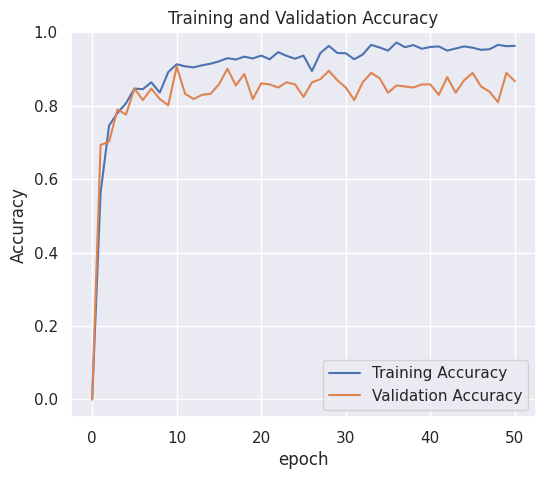

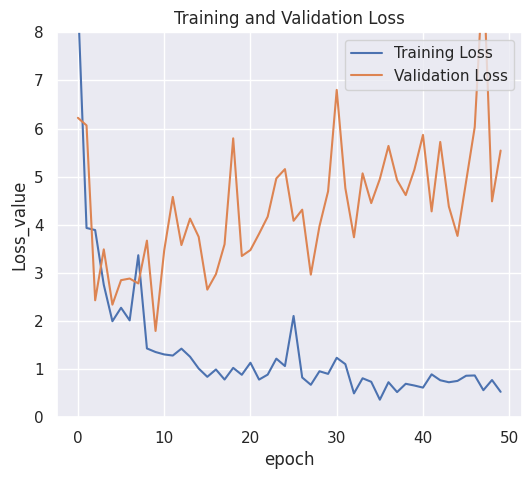

In [ ]:
import seaborn as sns
sns.set()
acc = [0.] + r.history['accuracy']
val_acc = [0.] + r.history['val_accuracy']

loss = r.history['loss']
val_loss = r.history['val_loss']

plt.figure(figsize=(6, 5))
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.savefig('VGG16_acc')

print()
plt.figure(figsize=(6, 5))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss_value')
plt.ylim([0,8.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.savefig('VGG16_Loss')

plt.show()

### F1 Score and Confusion Matrix

4/4 [==============================] - 2s 144ms/step
              precision    recall  f1-score   support

           0       1.00      0.73      0.85        30
           1       0.96      0.73      0.83        30
           2       0.65      1.00      0.79        30
           3       0.86      0.83      0.85        30

    accuracy                           0.82       120
   macro avg       0.87      0.83      0.83       120
weighted avg       0.87      0.82      0.83       120



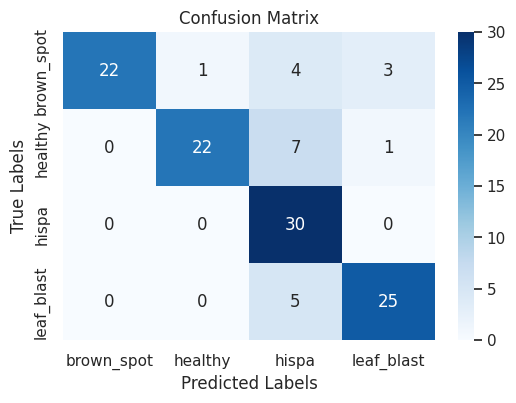

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# Get the predicted labels for the validation set### Libraries
# Load the trained model
#model = keras.models.load_model("RESNET50_model.h5")

test_step_sz = test_set.n/test_set.batch_size
test_images, test_labels = [], []
for i in np.arange(test_step_sz):
    batch_images, batch_labels = test_set.next()
    test_images.append(batch_images)
    test_labels.append(batch_labels)


test_images = np.concatenate(test_images)
test_labels = np.concatenate(test_labels)



y_pred = model.predict(test_images)
y_pred = np.argmax(y_pred, axis=1)

# Get the true labels for the validation set
y_true = np.argmax(test_labels, axis =1)

# Calculate classification metrics
report = classification_report(y_true, y_pred)
print(report)




# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Get class labels
class_labels = list(valid_set.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
plt.savefig("ResNet50_ConfusionMatrix.png")



### Testing


In [ ]:
# Load the trained model
#model = keras.models.load_model("GoogLeNet_re_model.h5")

# Make predictions on the test images
predictions = model.predict(test_set)

# Get the predicted class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get the class names
class_names = training_set.class_indices

# Get the disease labels
disease_labels = {
    0: "Brown_Spot",
    1: "Healthy",
    2: "Hispa",
    3: "Leaf_Blast"
}

# Print the predictions for each test image
for i in range(len(test_set.filenames)):
    image_path = os.path.join(test_path, test_set.filenames[i])
    image_label = predicted_labels[i]
    #image_class = class_names[image_label]
    image_disease = disease_labels[image_label]
    print(f"Image: {image_path}")
    #print(f"Class: {image_class}")
    print(f"Disease: {image_disease}")
    print("----------------------")

4/4 [==============================] - 9s 2s/step
Image: /content/drive/MyDrive/Rice_Dataset_2/RiceLeafsDisease/test/brown_spot/IMG_2992.jpg
Disease: Leaf_Blast
----------------------
Image: /content/drive/MyDrive/Rice_Dataset_2/RiceLeafsDisease/test/brown_spot/IMG_3018.jpg
Disease: Brown_Spot
----------------------
Image: /content/drive/MyDrive/Rice_Dataset_2/RiceLeafsDisease/test/brown_spot/IMG_3047.jpg
Disease: Brown_Spot
----------------------
Image: /content/drive/MyDrive/Rice_Dataset_2/RiceLeafsDisease/test/brown_spot/IMG_3048.jpg
Disease: Healthy
----------------------
Image: /content/drive/MyDrive/Rice_Dataset_2/RiceLeafsDisease/test/brown_spot/IMG_3072.jpg
Disease: Hispa
----------------------
Image: /content/drive/MyDrive/Rice_Dataset_2/RiceLeafsDisease/test/brown_spot/IMG_3077.jpg
Disease: Hispa
----------------------
Image: /content/drive/MyDrive/Rice_Dataset_2/RiceLeafsDisease/test/brown_spot/IMG_3091.jpg
Disease: Healthy
----------------------
Image: /content/drive/MyDriv